In [1]:
import pandas as pd

In [4]:
house_data = pd.read_csv('Data/house_rental_data.csv.txt', index_col='Unnamed: 0')

In [22]:
house_data

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000
6,1127.886,11,12,4,2,2,148000
7,1352.040,5,7,3,2,1,58000
8,757.854,5,14,1,0,1,48000
9,1152.792,10,12,3,2,2,45000
10,1423.200,4,5,4,2,2,65000


In [6]:
from sklearn.neighbors import NearestNeighbors

In [7]:
nn = NearestNeighbors(n_neighbors=3)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
ss = StandardScaler()

In [11]:
X_tf = ss.fit_transform(house_data)

/home/awantik/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/awantik/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [12]:
nn.fit(X_tf)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=3, p=2, radius=1.0)

In [17]:
houses = nn.kneighbors(X_tf[:1])[1][0]

In [20]:
house_data.iloc[houses]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
181,1494.360,2,7,2,2,2,49800
334,1494.360,2,7,2,2,2,48800


In [21]:
X_tf[:1]

array([[-4.56393027e-01, -1.01489712e+00, -7.72346989e-01,
        -8.28956338e-01,  4.02693633e-01,  2.76918224e-01,
         3.70055758e-04]])

In [23]:
from sklearn.datasets import fetch_olivetti_faces

In [24]:
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/awantik/scikit_learn_data


In [25]:
targets = faces.target

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

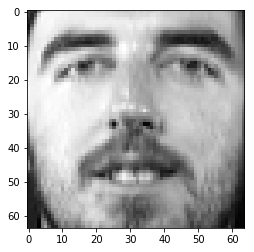

In [46]:
plt.imshow(faces.images[100], cmap='gray')

In [31]:
len(faces.images)

400

In [32]:
faces.images[0].shape

(64, 64)

### Dataset description
* 40 persons
* 10 image per person

In [50]:
faces.data[399].shape

(4096,)

In [51]:
faces.images.shape

(400, 64, 64)

In [52]:
faces.data.shape

(400, 4096)

In [53]:
train = faces.data[targets < 30]
test = faces.data[targets >= 30]

In [55]:
trainX = train[:,:2048]
trainY = train[:,2048:]
testX = test[:,:2048]
testY = test[:,2048:]

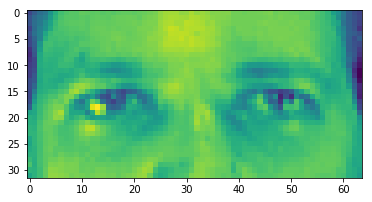

In [57]:
plt.imshow(train[0][:2048].reshape(32,64))

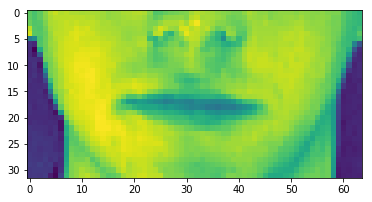

In [59]:
plt.imshow(trainY[0][:2048].reshape(32,64))

In [60]:
from sklearn.neighbors import KNeighborsRegressor

In [64]:
nn_r = KNeighborsRegressor(n_neighbors=20,weights='distance', n_jobs=-1)

In [65]:
nn_r.fit(trainX,trainY)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
          weights='distance')

In [67]:
gen = nn_r.predict(testX)

In [68]:
gen.shape

(100, 2048)

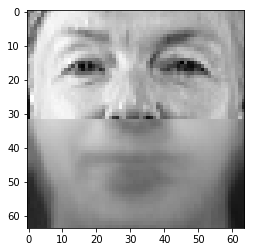

In [78]:
res = np.vstack([testX[11].reshape(32,64), gen[11,:].reshape(32,64)])
plt.imshow(res, cmap='gray')

In [79]:
from sklearn.datasets import load_digits

In [80]:
digits = load_digits()

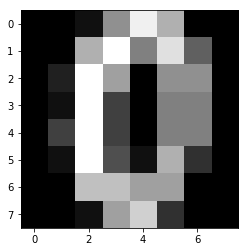

In [84]:
plt.imshow(digits.images[10], cmap='gray')

In [86]:
digits.data

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [87]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [90]:
km = KMeans(n_clusters=10)

In [91]:
km.fit(digits.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [104]:
np.where(km.labels_ == 2)

(array([  15,   25,   32,   33,   35,   46,   71,   74,  102,  109,  117,
         120,  135,  145,  155,  162,  163,  165,  176,  201,  204,  230,
         237,  245,  246,  271,  281,  288,  302,  327,  330,  365,  376,
         391,  401,  411,  419,  432,  460,  488,  495,  503,  506,  521,
         548,  587,  625,  633,  651,  661,  671,  679,  681,  692,  717,
         720,  748,  755,  763,  766,  781,  791,  801,  808,  809,  811,
         822,  847,  850,  878,  885,  893,  896,  910, 1003, 1034, 1044,
        1054, 1061, 1062, 1064, 1075, 1098, 1101, 1129, 1136, 1144, 1147,
        1162, 1172, 1182, 1189, 1190, 1192, 1195, 1197, 1203, 1228, 1231,
        1233, 1259, 1264, 1266, 1274, 1277, 1302, 1312, 1319, 1320, 1322,
        1333, 1358, 1389, 1396, 1407, 1420, 1489, 1532, 1535, 1550, 1560,
        1568, 1571, 1575, 1576, 1578, 1580, 1582, 1589, 1614, 1617, 1643,
        1650, 1656, 1659, 1662, 1672, 1682, 1690, 1699, 1700, 1702, 1713,
        1738, 1765, 1776]),)

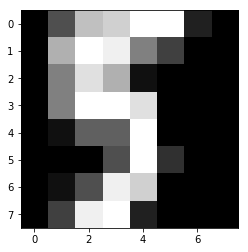

In [105]:
plt.imshow(digits.images[15], cmap='gray')

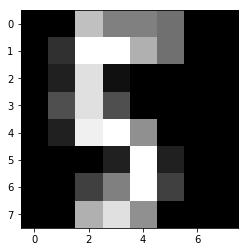

In [106]:
plt.imshow(digits.images[25],cmap='gray')

In [108]:
digits.target[25]

5

In [110]:
digits.target.shape

(1797,)

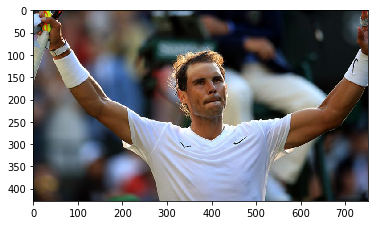

In [112]:
from skimage import io
image = io.imread('Data/nadal.jpg')
plt.imshow(image)

In [113]:
image.shape

(428, 752, 3)

In [115]:
image = image/255.0

In [118]:
image_data = image.reshape(-1,3)

In [119]:
image_data.shape

(321856, 3)

In [120]:
km = KMeans(n_clusters=3, n_jobs=-1)

In [121]:
km.fit(image_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [122]:
km.cluster_centers_

array([[0.67232142, 0.70628033, 0.77136762],
       [0.10816772, 0.10251858, 0.10226602],
       [0.392361  , 0.33929145, 0.32520442]])

In [130]:
km.cluster_centers_[[1,1,0]]

array([[0.10816772, 0.10251858, 0.10226602],
       [0.10816772, 0.10251858, 0.10226602],
       [0.67232142, 0.70628033, 0.77136762]])

In [125]:
data = km.cluster_centers_[km.labels_]

In [127]:
img = data.reshape(428, 752, 3)

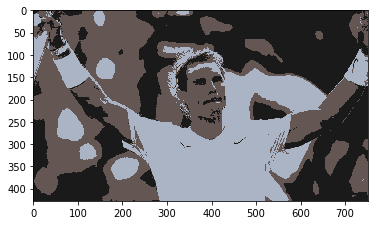

In [128]:
plt.imshow(img)